# CASE STUDY: IRIS PLANT CLASSIFICATION USING K-NEAREST NEIGHBORS




# STEP #0: PROBLEM STATEMENT

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. The attribute to be predicted is the class of iris plant. The classes are as follows: 1. Iris Setosa, 2. Iris Versicolour, 3. Iris Virginica

There are 4 features: 
1. sepalLength: sepal length in cm
2. sepalWidth: sepal width in cm
3. petalLength: petal length in cm
4. petalWidth: petal width in cm

There are 3 classes represneting class label of iris flower {1,2,3} 
1. Iris Setosa
2. Iris Versicolour
3. Iris Virginica

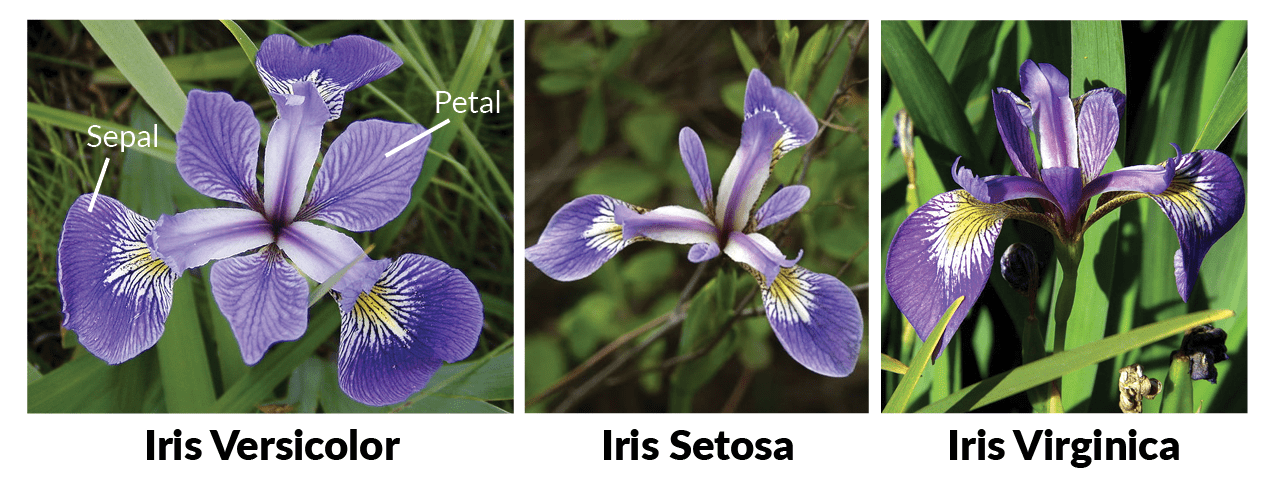


DATA SOURCE: https://www.kaggle.com/uciml/iris

# STEP #1: IMPORTING DATA

In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns


In [2]:
# dataframes creation for both training and testing datasets 
iris_df = pd.read_csv('iris.csv')


# STEP #2: EXPLORING THE DATASET  

In [3]:
# Let's view the head of the training dataset
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Let's view the last elements in the training dataset
iris_df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


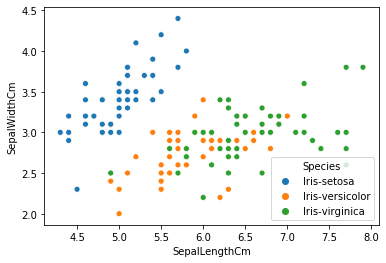

In [5]:
sns.scatterplot( x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species', data = iris_df)

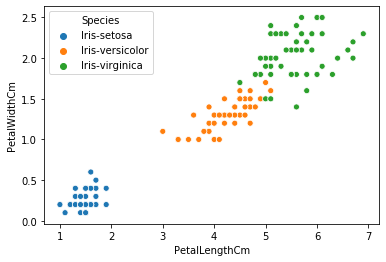

In [6]:
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', hue = 'Species', data = iris_df)

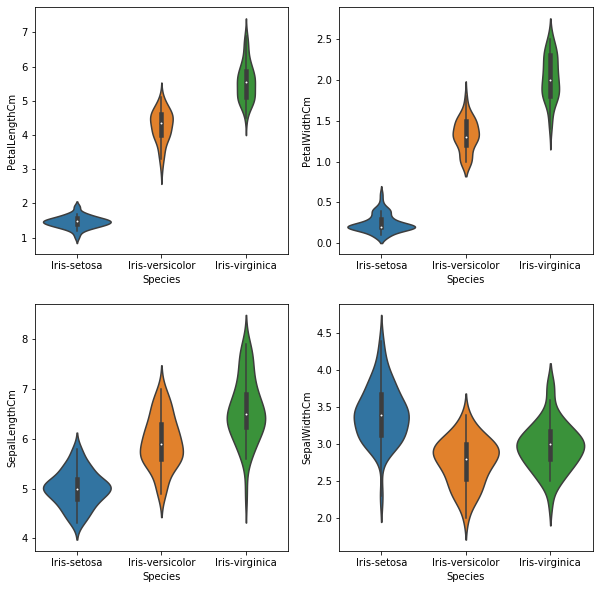

In [7]:
# Let's show the Violin plot 

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris_df)

plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris_df)

plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris_df)

plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris_df)

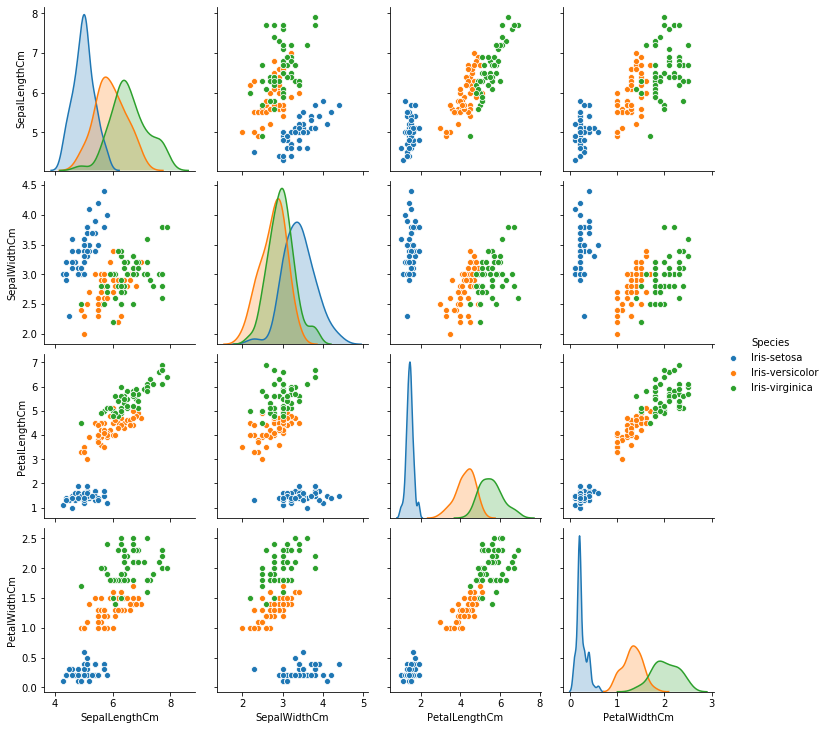

In [8]:
# Let's try the Seaborn pairplot
sns.pairplot(iris_df, hue = 'Species')

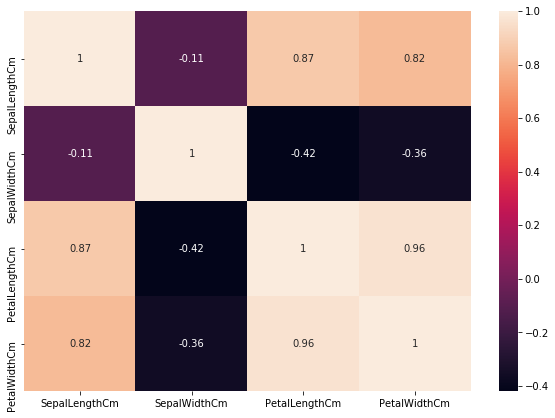

In [9]:
# Let's check the correlation between the variables 
plt.figure(figsize=(10,7)) 
sns.heatmap(iris_df.corr(),annot=True) 


# STEP #3: DATA CLEANING

In [10]:
# Let's drop the ID and Species (target label) coloumns
X = iris_df.drop(['Species'],axis=1)
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
y = iris_df['Species']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [12]:
# Import train_test_split from scikit library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35)

In [13]:
X_train.shape

(97, 4)

In [14]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
105,7.6,3.0,6.6,2.1
121,5.6,2.8,4.9,2.0
126,6.2,2.8,4.8,1.8
149,5.9,3.0,5.1,1.8
86,6.7,3.1,4.7,1.5


In [15]:
y_train

105     Iris-virginica
121     Iris-virginica
126     Iris-virginica
149     Iris-virginica
86     Iris-versicolor
            ...       
141     Iris-virginica
17         Iris-setosa
85     Iris-versicolor
50     Iris-versicolor
75     Iris-versicolor
Name: Species, Length: 97, dtype: object

# STEP #4: TRAINING THE MODEL

In [16]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# STEP #5: EVALUATING THE MODEL

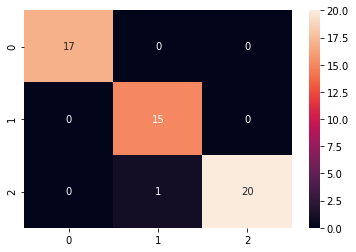

In [17]:
y_predict = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt="d")

In [18]:
print(classification_report(y_test, y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.95      0.98        21

       accuracy                           0.98        53
      macro avg       0.98      0.98      0.98        53
   weighted avg       0.98      0.98      0.98        53

